# Machine Learning Notebook 1 - Régression Linéaire

* Author: Yann Ravel-Sibillot
* Email: yann.ravelsibillot[at]gmail[dot]com
* Github: yannrs

Ce notebook est une mise en application grâce à Python des concepts explorés en cours de Machine Learning. Les équations et algorithmes à mettre en place sont décrit dans les slides 33 à 47.

Dans les exercices suivant, basés sur des problématiques réelles, nous allons implémenter des régressions linéaires simple en utilisant une descente de gradient, mais aussi grâce aux libraries de Machine Learning tel Scikit-learn. Puis nous irons un peu plus loin pour gérer des variables multiples et des exemples un peu plus complexes.

## Régression Linéaire avec une variable

Dans cette première partie de l'excercice, nous allons implémenter une régression linéaire avec impliquant une variable, pour prédire le revenue généré par un Food Truck. 
Vous êtes le CEO d'un restaurant sous franchise et vous êtes en train d'étudier plusieurs villes pour ouvrir de nouvelles antenne. La chaine de restaurant a déjà des camions dans diverses villes et vous avez des données de chiffre d'affaire (**CA**) et de taille de population dans ces villes. 

### Commençons par importer quelques Librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

### Puis les données sont importés

In [2]:
path = os.getcwd() + '/data/nb1_data_population_profit.txt'
print('Les données doivent ce situer dans ici:', path)

Les données doivent ce situer dans ici: C:\Users\yann\Deeptech\Others\Formation\Esic_machine_learning/data/nb1_data_population_profit.txt


In [3]:
# Importation des données
data = pd.read_csv(path, header=None, names=['Population', 'CA'])

### Première Analyse du contenu

Visualisation des premières valeurs importées

In [4]:
data.head()

,Population,CA
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Quelques métriques

In [5]:
data.describe()

,Population,CA
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Puis si nous affichons ces données sur un graphique, pour avoir une meilleure idée de ce que nous avons ici.

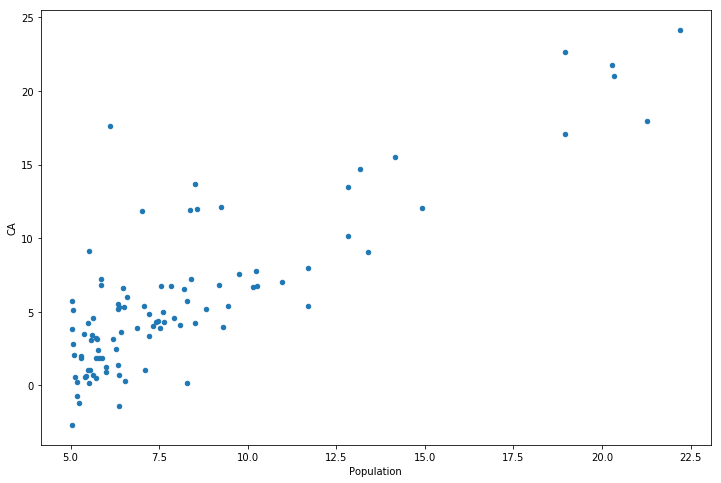

In [6]:
data.plot(kind='scatter', x='Population', y='CA', figsize=(12,8))

Vos commentaires :

- pas de relation déterministe
- quelques belles execption de profit pour une petit population
- une tendance certaine d'augmentation du CA avec la taille de la population

## Préparation des données

Nous ajoutons une colonne de 1 dans le training set, pour pouvoir utiliser une version matriciel du calcul du coût et du gradient.

In [7]:
data.insert(0, 'Ones', 1)

Maintenant nous pouvons extraire :
- un vecteur de donnée X,  (training data)
- un vecteur à prédire y, (target variable)

In [8]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

Pour vérifier que nous avons bien un X et un y correct.

In [9]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [10]:
y.head()

,CA
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


Pour simplifier les calcules suivant, nous convertissons les matrices pandas X, et y en matrice Numpy. 

In [11]:
X = np.matrix(X.values)
y = np.matrix(y.values)

#### Choix de l'ordre de la régression

Nous initialisons ici theta (les paramétres que nous devons déterminer, aussi nommé w dans les slides).
Nous pouvons par exemple commencer avec un ordre 1, soit 2 paramétres. Puis nous pourrons essayer de complexifier le modèle.

In [12]:
theta = np.matrix(np.array([0,0]))

Petite vérification des tailles des matrices ainsi créées:

In [13]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

### Modélisation

Maintenant que nous avons une idée plus claire des données disponible, nous pouvons commencer la modélisation.
Nous allons utiliser 2 méthodes différente pour implémenter une régression linéaire et essayer d'estimer le revenue d'un camion en fonction de la taille de la population de la ville.

#### Avec notre descente de gradient 

First we'll create a function to compute the cost of a given solution (characterized by the parameters theta).

In [34]:
def computeCost(X, y, theta):
    '''
    Here we are implementing 𝐸(theta)/n, where n is the number of sample in the dataset, m the order the regression
    param X: numpy.array of shape n, m; Data used to predict y
    param y: numpy.array of shape n; Target that we want to predict from X
    param theta: numpy.array of shape m; Parameter that we want to optimise to find f such that y=f(x,w) 
    return Float; the cost function
    '''
    %% ======== TODO ========= %%
    cost = 0
    %% ======== END TODO ========= %%
    return cost

Test de la fonction avec les valeurs initiales de theta (0). Nous devons obtenir 32.07....

In [15]:
computeCost(X, y, theta)

32.072733877455676

Nous y sommes presque! Maintenant nous devons définir notre fonction de descente du gradient, pour optimiser les paramétres theta.

Indices:
* l'erreur à calculer peut s'écrire facilement avec la norme
* la correction des paramétres à partir d'un erreur doit être: $w_j = w_j - \alpha * (\sum(x*w^T - y))*x_j /N$


In [16]:
def gradientDescent(X, y, theta, alpha, iters):
    '''
    Implementation of the gradient descente method, to optimize parameters of the linear regression here
    
    param X: numpy.array of shape n, m; Data used to predict y
    param y: numpy.array of shape n; Target that we want to predict from X
    param theta: numpy.array of shape m; Parameter that we want to optimise to find f such that y=f(x, theta) 
    param alpha: Float; Learning rate, and speed that the gradient will use to learn at each step
    param iters: Int; Number of loop the gradient will use to optimise the parameters theta
    return theta: numpy.array of shape m; cost: Float
    '''
    # Add parameters to save the evolution of the learning
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        # Computation of the errors between the prediction f(x,theta) and the real target y
        %% ======== TODO ========= %%
        error = (X * theta.T) - y
        %% ======== END TODO ========= %%
        
        for j in range(parameters):
            # Compute the gradient for one parameters at the time. 
            term = np.multiply(error, X[:,j])
            %% ======== TODO ========= %%
            temp[0,j] = 0
            %% ======== END TODO ========= %%
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

Essayons notre gradient avec:
* alpha le learning rate
* iters le nombre d'itérations qui seront utiliser pour optimiser les paramétres de la régression

In [17]:
%% ======== TODO ========= %%
alpha = 0.01
iters = 1000
%% ======== END TODO ========= %%

Maintenant si nous exécutons notre gradient sur le probléme de prédiction du Chiffre d'affaire en fonction de la taille de la ville.

In [18]:
theta_optimized, cost = gradientDescent(X, y, theta, alpha, iters)
theta_optimized

matrix([[-3.24140214,  1.1272942 ]])

## Analyse des résultats

Nous sommes passé d'un loss de 32 à une loss de :

In [19]:
# Dernière loss obtenu à la fin de l'optimisation
cost[-1]

4.515955503078912

Maintenant nous pouvons afficher notre Regression et visualiser notre beau travail !

In [ ]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)   # Creation d'un vecteur régulièrement espacé de point pour prédire

In [ ]:
# Creation de l'ensemble des prédictions à partir du training set. f = w_0 + w_1*x
%% ======== TODO ========= %%
f = theta_optimized[0, 0] + (theta_optimized[0, 1] * x)   
%% ======== END TODO ========= %%

Text(0.5, 1.0, "Chiffre d'affaire prédit vs. Taille de la Population")

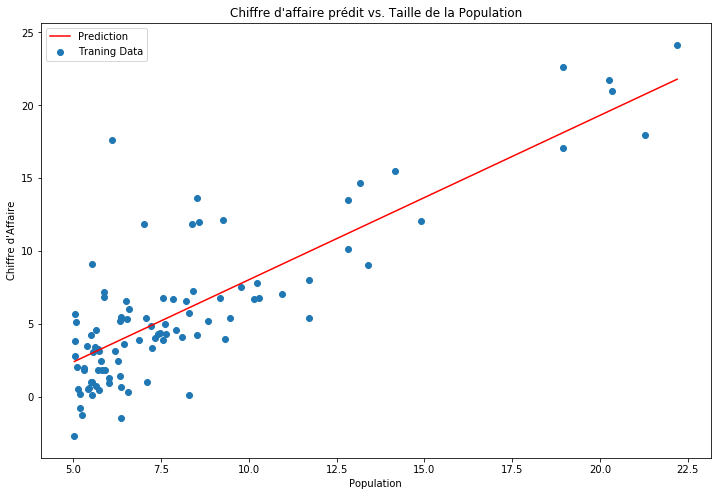

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.CA, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Chiffre d\'Affaire')
ax.set_title('Chiffre d\'affaire prédit vs. Taille de la Population')

Votre commentaire :

In [ ]:
%% ======== TODO ========= %%
Votre commentaire
%% ======== END TODO ========= %%

Avons nous choisi de bon paramétre ? Nous pouvons visualiser l'évolution de la loss en fonction du nombre d'itération que nous avons demandé.

Text(0.5, 1.0, 'Loss vs. Training Epoch')

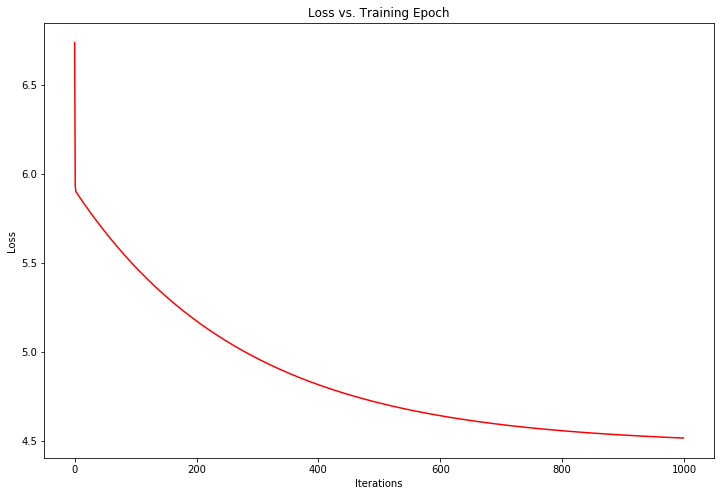

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.set_title('Loss vs. Training Epoch')

Vos commentaire:

 A remarquer !  
    * La loss diminue tout le temps - Cest l'exemple d'un probléme d'optimisation convexe

## Avec Scikit-learn

Au lieu d'implémenter l'ensemble des algorithmes à partir de rien, il est possible des librairies qui ont déjà optimisés tous les calculs pour nous ! Scikit-learn est maintenu par Google, et l'une des plus connu et utilisée, dans le monde professionel et de recherche.

Ici nous voulons faire comme dans la première version, une Régression linéaire. Nous avons donc besoin de la fonction LinearRegression de Scikit-learn. La documentatio est disponible ici:
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [23]:
from sklearn.linear_model import LinearRegression

Maintenant nous allons créer un modèle de régression

In [24]:
model = LinearRegression()

Puis l'entrainer

In [25]:
%% ======== TODO ========= %%
model.
%% ======== END TODO ========= %%

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Analyse des résultats

Affichons ici les prédiction du modèle de scikit-learn.

In [ ]:
x = np.array(X[:, 1].A1)

In [ ]:
%% ======== TODO ========= %%
f = 0
%% ======== END TODO ========= %%

Text(0.5, 1.0, "Prediction du Chiffre d'affaire vs. Taille de la Population")

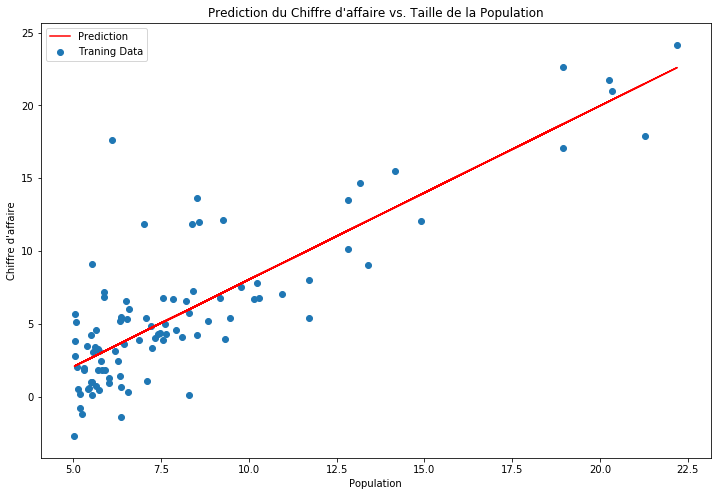

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.CA, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Chiffre d\'affaire')
ax.set_title('Prediction du Chiffre d\'affaire vs. Taille de la Population')

Parfait vous savez maintenant faire des régressions linéaires !

# Pour aller plus loin

## Régression linéaire avec plusieurs variables

Maintenant si nous prenons le cas du prix des habitations, en prenant en compte cette fois:
* le nombre de chambre
* la taille de l'habitation

Nous allons appliquer exactement les même techniques que précedement.

### Analyse du dataset

In [27]:
path = os.getcwd() + '/data/nb1_data_housing.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [28]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


### Preprocessing

Ici nous avons besoin de normaliser les variables car elles ont des ordre de grandeur très différente.

In [29]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


### Processing

Now let's repeat our pre-processing steps from part 1 and run the linear regression procedure on the new data set.

In [30]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

### Modèle

In [31]:
# perform linear regression on the data set
%% ======== TODO ========= %%
theta_optimized2, cost2 = 0,0
%% ======== END TODO ========= %%

# get the cost (error) of the model
computeCost(X2, y2, theta_optimized2)

0.13070336960771892

In [32]:
theta_optimized2

matrix([[-1.10868761e-16,  8.78503652e-01, -4.69166570e-02]])

### Analyse des résultats

Nous pouvons regarder de même l'évolution de l'entrainement.

Text(0.5, 1.0, 'Error vs. Training Epoch')

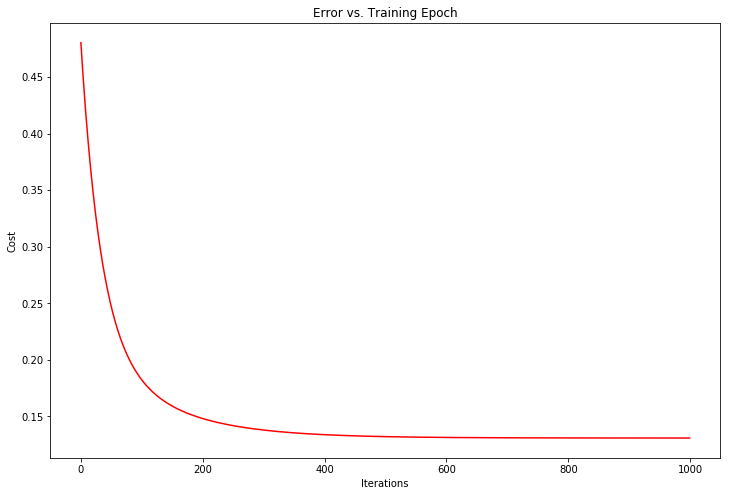

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')